# Part I - Ford GoBike System Data Exploration
## by Badreddine Mouttaqui

## Introduction
 
> This dataset  includes o records of individual rides made in a bike-sharing system covering the greater San Francisco Bay area in Feb-2019.

> We are mainly trying to answer some questions, like : 
    
   >- How long does the average trip take?
   >- Does the above depend on if a user is a subscriber or customer?
   >- Is there a relationship between gender and average trip duration? ...etc


>  To answer the above questions, we will be using visualization alongside data wrangling techniques to explore and draw insights about the dataset.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
# loading the dataset into a pandas dataframe
fordgb = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
fordgb.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [4]:
# high-level overview of data shape and composition
print(fordgb.shape)
print(fordgb.dtypes)
fordgb.head()

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [5]:
# the general information about features
fordgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

we can view null values in member_birth_year & member_gender columns.

In [6]:
# descriptive statistics for numeric variables
fordgb.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

in the member_birth_year column  the 1878 value (min) seems illogic

in the duration_sec column, 61sec & 85444s (approx. 24 hours non stop) seems illogic.

In [7]:
# Checking number of duplicated data entries
sum(fordgb.duplicated()) 

0

In [8]:
# Checking number of null values on each column
fordgb.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

##### Observations:

1. Datatype issues:
    - start_time, end_time to convert into datetime
    - start_station_id, end_station_id to convert from float to str
    - bike_id must be str instead of int
    - user_type, bike_share_for_all_trip must be category.
    

2. There is outlier values in the member_birth_year and duration_sec columns:
     - filtering and removing abnormal values in duration_sec
     - deleting the age outliers and setting age below 70


3. We will derive an age column  from member_birth_year

4. We will create time columns from start_time & end_time

5. Non wanted columns should be dropped



#### Cleaning Data


In [9]:
# Make copy of the data
fordgb_clean = fordgb.copy()

###### 1. Datatype issues:
- start_time, end_time are object, should be datetime
- start_station_id, end_station_id are float, should be str
- bike_id is int, should be str
- user_type, bike_share_for_all_trip are object, should be category

###### Define
- Use pd.to_datetime to convert start_time, end_time datatype to datetime.
- Use astype(str) to convert start_station_id, end_station_id, bike_id to str.
- Use astype('category') to convert user_type, bike_share_for_all_trip, datatype to category

###### Code

In [10]:
# Use pd.to_datetime to convert datatype to datetime
fordgb_clean.start_time = pd.to_datetime(fordgb_clean.start_time)
fordgb_clean.end_time = pd.to_datetime(fordgb_clean.end_time)

# Use astype(str) to convert datatype to str
fordgb_clean.start_station_id = fordgb_clean.bike_id.astype(str)
fordgb_clean.end_station_id = fordgb_clean.bike_id.astype(str)
fordgb_clean.bike_id = fordgb_clean.bike_id.astype(str)

# Use astype('category') to set user type, bike_share_for_all_trip, rental_access_method to category
fordgb_clean.user_type = fordgb_clean.user_type.astype('category')
fordgb_clean.bike_share_for_all_trip = fordgb_clean.bike_share_for_all_trip.astype('category')



###### Test

In [11]:
fordgb_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip          category
dtype: object

###### 2. Deleting outlier values in the duration_sec and member_birth_year  columns 

max duration_sec is 85444 seconds, min is 61 seconds. A bike ride for 61 seconds is probably too short. It's possible that users have changed their mind not to rent at that time. 

A bike ride of 85444 seconds (near 24 hours) makes no sense. It's quite possible that user forgot to log out or due to system bug.

###### Define
filter and remove abnormal values in duration_sec

###### Code

In [12]:
fordgb_clean = fordgb_clean[fordgb_clean.duration_sec != 85444]
fordgb_clean = fordgb_clean[fordgb_clean.duration_sec != 61]

###### Test

In [13]:
fordgb_clean.duration_sec.describe()

count    183393.000000
mean        725.681765
std        1783.532803
min          62.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       84548.000000
Name: duration_sec, dtype: float64

###### Define
Deleting the age outliers and setting age below 70

###### Code

In [14]:
# considering from 1952 onwards , dropping Age > 70
fordgb_clean.drop(fordgb_clean[(fordgb_clean.member_birth_year < 1952 )].index, inplace = True)

###### Test

In [15]:
fordgb_clean.member_birth_year.min()

1952.0

###### 3. Creating an age column from member_birth_year

###### Define

Substracting member_birth_year from the actual year 2022 and append it to the dataframe

###### Code

In [16]:
# creating the age column
fordgb_clean['age'] = 2022 - fordgb_clean.member_birth_year

###### Test

In [17]:
fordgb_clean.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

  start_station_id                                start_station_name  \
0             4902  Montgomery St BART Station (Market St at 2nd St)   
1             2535                     The Embarcadero at Steuart St   
2             5905                           Market St at Dolores St   
3             6638                           Grove St at Masonic Ave   
4             4898                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude end_station_id  \
0               37.789625              -122.400811           4902   
1               37.791464              -122.391034           2535   
2               37.769305              -122.426826           5905   
3               37.774836              -122.446546           6638   
4               37.804562              -122.271738           4898   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude bike_id   user_type  member_birth_year member_gender  \
0            -122.402923    4902    Customer             1984.0          Male   
1            -122.393170    2535    Customer                NaN           NaN   
2            -122.404904    5905    Customer             1972.0          Male   
3            -122.444293    6638  Subscriber             1989.0         Other   
4            -122.248780    4898  Subscriber             1974.0          Male   

  bike_share_for_all_trip   age  
0                      No  38.0  
1                      No   NaN  
2                      No  50.0  
3                      No  33.0  
4                     Yes  48.0

###### 4. Creating time columns from start_time & end_time

In [18]:
# from start_time
fordgb_clean['start_weekday'] = fordgb_clean.start_time.dt.weekday 
fordgb_clean['start_hour'] = fordgb_clean.start_time.dt.hour

# from end_time
fordgb_clean['end_hour'] = fordgb_clean.end_time.dt.hour

###### 5. dropping unwanted columns
###### Define 

Using .drop() to remove unecessary columns or redundant ones


###### Code

In [19]:
#using drop to remove unwanted columns
fordgb_clean = fordgb_clean.drop(['start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude','bike_id','member_birth_year','bike_share_for_all_trip'], axis = 1)

###### Test

In [20]:
fordgb_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'user_type', 'member_gender',
       'age', 'start_weekday', 'start_hour', 'end_hour'],
      dtype='object')

#### Store and Load Clean Data

After doing the primary wrangling and cleaning, let's store the clean version into a dataframe to use in the analysis & data viz section

In [21]:
# Store the clean data in a CSV file
fordgb_clean.to_csv('fordgb_clean.csv', index = False)

# load data to a dataframe
df = pd.read_csv('fordgb_clean.csv')
df

duration_sec               start_time                 end_time  \
0              52185  2019-02-28 17:32:10.145  2019-03-01 08:01:55.975   
1              42521  2019-02-28 18:53:21.789  2019-03-01 06:42:03.056   
2              61854  2019-02-28 12:13:13.218  2019-03-01 05:24:08.146   
3              36490  2019-02-28 17:54:26.010  2019-03-01 04:02:36.842   
4               1585  2019-02-28 23:54:18.549  2019-03-01 00:20:44.074   
...              ...                      ...                      ...   
182359           480  2019-02-01 00:04:49.724  2019-02-01 00:12:50.034   
182360           313  2019-02-01 00:05:34.744  2019-02-01 00:10:48.502   
182361           141  2019-02-01 00:06:05.549  2019-02-01 00:08:27.220   
182362           139  2019-02-01 00:05:34.360  2019-02-01 00:07:54.287   
182363           271  2019-02-01 00:00:20.636  2019-02-01 00:04:52.058   

         user_type member_gender   age  start_weekday  start_hour  end_hour  
0         Customer          Male  38.0              3          17         8  
1         Customer           NaN   NaN              3          18         6  
2         Customer          Male  50.0              3          12         5  
3       Subscriber         Other  33.0              3          17         4  
4       Subscriber          Male  48.0              3          23         0  
...            ...           ...   ...            ...         ...       ...  
182359  Subscriber          Male  26.0              4           0         0  
182360  Subscriber          Male  38.0              4           0         0  
182361  Subscriber          Male  32.0              4           0         0  
182362  Subscriber          Male  34.0              4           0         0  
182363  Subscriber          Male  33.0              4           0         0  

[182364 rows x 9 columns]

### What is the structure of your dataset?

> This dataset consists of 183,412 rows. There are 16 features. 

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in this dataset is figuring out how the trip duration (duration_sec) is dependent to other factors, such as: age, gender, user_type, start_hour, end_hour, user type from the dataset.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The demographics might affect trip duration : gender and age

> The user_type (being a subscriber or not) also might affect trip duration

> Another feature is the time of the day the trip was taken - was it in the early, mid or late hours of the day? This feature will be derived from the start_time column.


## Univariate Exploration

> In this section i will investigate distributions of these features :

      > 1. duration_sec
      > 2. member_gender 
      > 3. age 
      > 4. user_type
      > 5. start_hour
      > 6. end_hour
      > 7. start_weekday
      
 I will then comment observations & insights after plotting each variable

#### 1. duration_sec

In [22]:
# Descriptive statistics
print('median:', df.duration_sec.median())
print(df.duration_sec.describe())

median: 514.0
count    182364.000000
mean        726.003712
std        1787.125051
min          62.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       84548.000000
Name: duration_sec, dtype: float64


In [23]:
# univariate plot of duration_sec 

binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration of trip (sec)')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

There's a long tail in the distribution, so let's plot it on a logartithmic scale


/Users/badr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


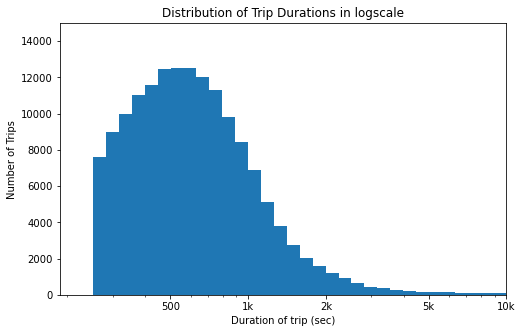

In [24]:
# univariate plot of duration_sec on a logscale

log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Durations in logscale')
plt.xlabel('Duration of trip (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

The chart above indicates that duration_sec is a left-skewed distribution (until 2000 seconds = about half an hour of usage). Peak of the distribution is between 600 to 700sec (10 to 11 minute trips).


#### 2. member_gender

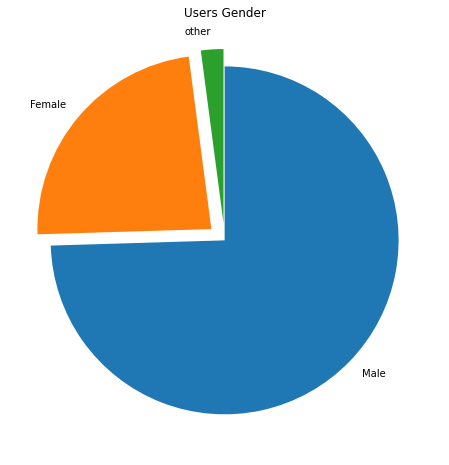

In [25]:
# univariate pie of member_gender 

plt.figure(figsize=[10, 8])
gender_counts = df['member_gender'].value_counts()

plt.pie(gender_counts, labels = ['Male','Female','other'], startangle = 90,explode =(0 , 0.1, 0.1)  ,
        counterclock = False);
plt.title('Users Gender');

From a gender perspective, we can state that majority of users are males. 

Undisclosed genders (other) are a minority (2%).

####  3. age 

In [26]:
# univariate plot of the age variable 

plt.figure(figsize=(12,6))
plt.hist(df['age'],bins = 15);
plt.title('Users Age Distribution');
plt.xlabel('age');
plt.ylabel('count');
plt.show()

Most of users age is ranging between 20 & 50, with a big cluster (majority of users) from 29 to 39 years old.

####  4. user_type (subscription)

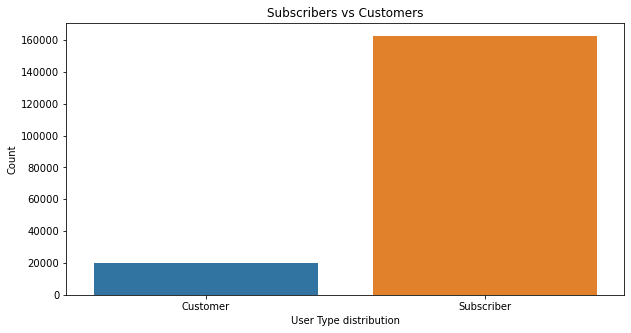

In [27]:
# univariate plot of the user_type variable  

plt.figure(figsize = (10,5))
plot = sns.countplot(data=df, x='user_type')
plt.xlabel('User Type distribution')
plt.ylabel('Count')
plt.title("Subscribers vs Customers")
plt.show()

The output above shows that the majority of the users (around 90%) are subscribers to the bike system.

####  5. start_hour

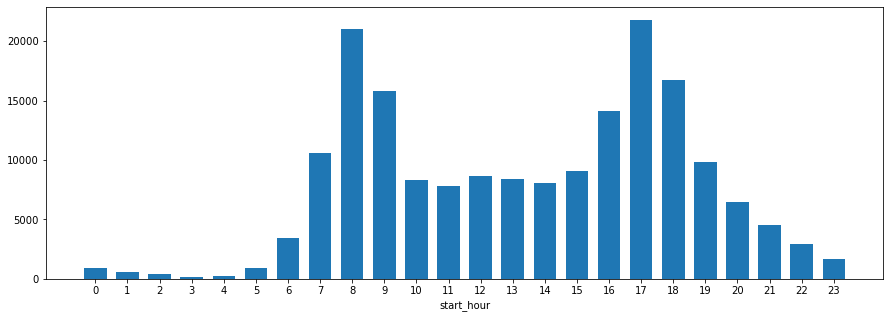

In [28]:
# univariate plot of the start_hour variable  
plt.figure(figsize=[15,5])
bin_edges = np.arange(-0.5, 23.5+1, 1)
plt.hist(data = df, x = 'start_hour', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 23+1, 1))
plt.xlabel('start_hour');

We can see that the distribution has two peaks at 8am and 17. These are rush hours  most work days start at 8 and end around 17.

####  6. end_hour

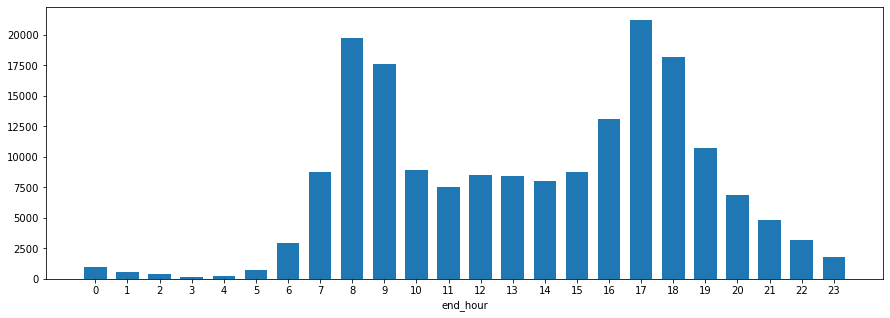

In [29]:
# univariate plot of the end_hour variable

plt.figure(figsize=[15,5])
bin_edges = np.arange(-0.5, 23.5+1, 1)
plt.hist(data = df, x = 'end_hour', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 23+1, 1))
plt.xlabel('end_hour');

The distribution is similar to start_hour, wich means that the trip started and ended for the same reasons above.

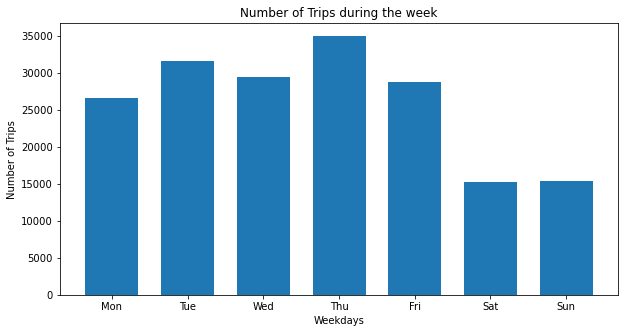

In [30]:
# Creating labels for each week day
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# ploting the distribution
plt.figure(figsize=[10,5])
bin_edges = np.arange(-0.5, 6.5+1, 1)
plt.hist(data = df, x = 'start_weekday', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 6+1, 1), weekday)
plt.xlabel('Weekdays')
plt.ylabel('Number of Trips')
plt.title("Number of Trips during the week")
plt.show()

This chart shows that trips were mostly took during workdays (Monday-Friday) more than week-end

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> duration_sec is mostly concentrated around a max of half an hour. Peak of the distribution is between 600 to 700sec (10 & 12 minutes). 

> From a gender perspective, the dataset contains many males than females. 

> Most users age is ranging between 29 & 39 with a left skewed distribution.

> Subscribers (around 90%) are more than customers 

> The distribution has two peaks at 8am and 17 for start_hour. These are rush hours.
same conclusion can be drawn for end_hour.

> Trips were mostly took during workdays (Monday-Friday) more than week-end

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> for the duration_sec there's a long tail in the distribution, so I put it on a log scale.

> for the age, I deleted the age outliers by setting age below 70

> I created time columns from start_time & end_time to draw insights using start_hour, end_hour & start_weekday.


## Bivariate Exploration

In this section, I'll investigate relationship between pairs of variables and answer the below questions : 

    - Question 1 : How does the trip duration distribution vary between customers and subscribers?
    
    - Question 2 : How does the trip duration distribution vary by age?
    
    - Question 3 : How does the trip duration distribution vary by gender?
    
    - Question 4 : How does the average trip duration vary during weekdays ? 
    
    

Let's first check how the trip duration varies between different user types.

#### Question 1 : How does the trip duration distribution vary between customers and subscribers?

#### Visualisation of duration_sec vs. user_type

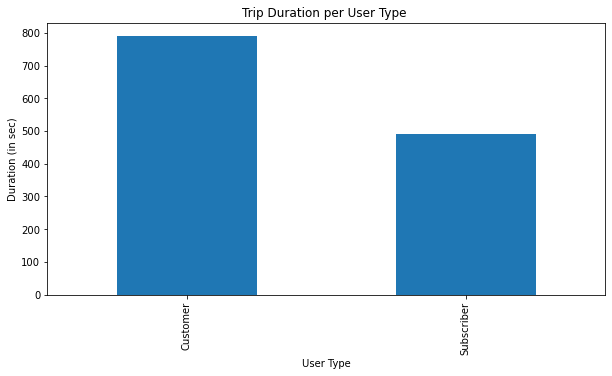

In [31]:
# bivariate plot of  duration_sec vs. user_type
plt.figure(figsize = (10,5))
df.groupby('user_type')['duration_sec'].median().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('User Type')
plt.ylabel('Duration (in sec)')
plt.title("Trip Duration per User Type ")
plt.show()

#### Observations :

From above, we can state that Customers trip duration is longer than the Subscribers to the system. 

In my opinion, its normal since customers use it to do a lot of things or wander around opposite that subscribers.

In [32]:
# Average trip duration for different user types
print(df.groupby('user_type').duration_sec.mean())

user_type
Customer      1432.892868
Subscriber     639.779049
Name: duration_sec, dtype: float64


#### Question 2 : How does the trip duration distribution vary by age?

#### Visualisation of duration_sec  vs. age

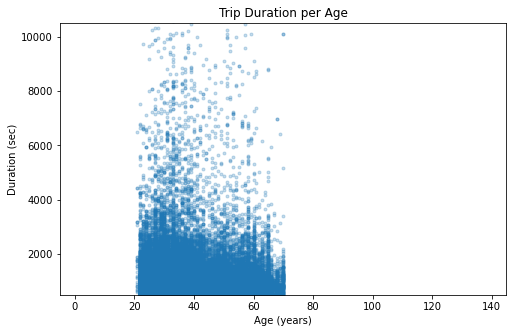

In [33]:
# bivariate plot of duration_sec vs. age
plt.figure(figsize=[8,5])
plt.scatter((df['age']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age (years)')
plt.ylabel('Duration (sec)')
plt.title("Trip Duration per Age")
plt.show()

#### Observations :

The chart above indicates that this distribution is left-skewed. Young adults People from 20-40 take longer trips 

#### Question 3 : How does the trip duration distribution vary by gender?

#### Visualisation of duration_sec vs. member_gender

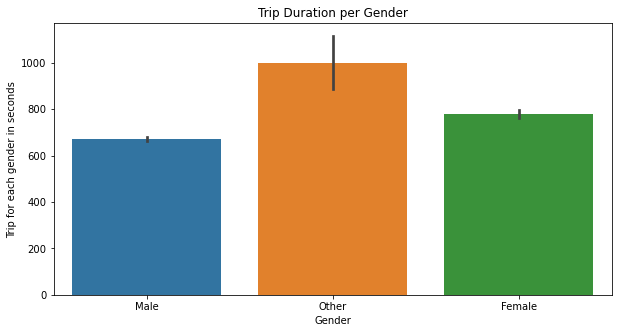

In [34]:
# bivariate plot of duration_sec vs. member_gender

plt.figure(figsize = (10,5))
sns.barplot(data = df, x = "member_gender", y = "duration_sec")
plt.xlabel('Gender')
plt.ylabel('Trip for each gender in seconds')
plt.title("Trip Duration per Gender")
plt.show()

#### Observations :

The output above shows that male users take shorters trips than female users. We can neglect the Other feature since they are not representative (% wise)

#### Question 4 : How does the average trip duration vary during weekdays ? 

#### Visualisation of duration_sec  vs. start_week

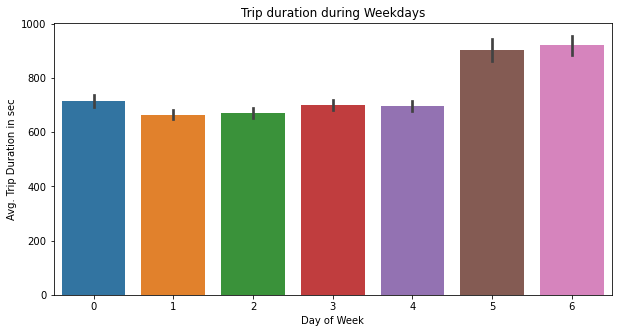

In [35]:
# bivariate plot of duration_sec vs. start_weekday

plt.figure(figsize = (10,5))
sns.barplot(data=df, x='start_weekday', y='duration_sec');
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in sec')
plt.title('Trip duration during Weekdays')
plt.show()

#### Observations :

The trips are much shorter on Monday-Friday compared to weekends. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Customers trip duration is longer than the Subscribers to the system.

> Young adults take longer trips.

> Male users take shorters trips than female users.

> The trips are much shorter on Monday-Friday compared to weekends. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The various features interactions all complement one another and make perfect sense.

## Multivariate Exploration

In this section, I'll investigate relationship between multiple variables and answer the below questions : 

    - Question 1 : How does the trip duration distribution vary between customers and subscribers accross gender?
    
    - Question 2 : How does the trip duration distribution vary between customers and subscribers accross age?
    
    - Question 3 : How does the average trip duration vary between customers and subscribers during weekdays ? 
    

#### Question 1 : How does the trip duration distribution vary between customers and subscribers accross gender?
    

####   Visualisation of duration_sec , member_gender &  user_type  

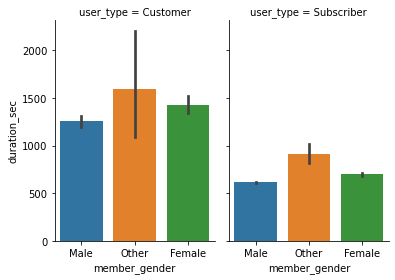

In [36]:
# multivariate plot of duration_sec vs. member_gender vs user_type

sns.catplot(x = "member_gender", y = "duration_sec",
                col = "user_type",
                data = df, kind = "bar",
                height=4, aspect=.7);

#### Observations :

Customers have a higher mean trip duration, now we can see this is true across all genders.

####  Question 2 : How does the trip duration distribution vary between customers and subscribers accross age?

####   Visualisation of duration_sec vs. age vs user_type 

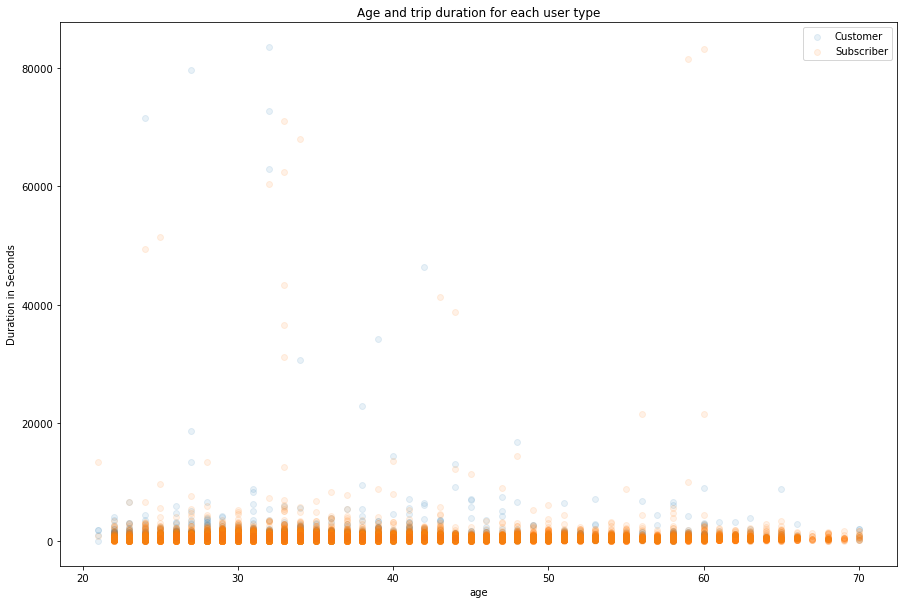

In [37]:
# multivariate plot of duration_sec vs. age vs user_type 
df1 = df.sample(20000, random_state=1)

plt.figure(figsize = [15, 10]);
user_type_markers = [['Customer', 'o'],
               ['Subscriber', 'x']]

for cat, marker in user_type_markers:
    df_cat = df1[df1['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'age', y = 'duration_sec', alpha=2/20);
plt.legend(['Customer','Subscriber']);
plt.xlabel('age');
plt.ylabel('Duration in Seconds');
plt.title("Age and trip duration for each user type");

#### Observations :

The majority of Old users are Subscribers and they spend little time in their bike 
trips.

Young Customers trip duration is slightly more than Young Subscribers.

#### Question 3 : How does the average trip duration vary between customers and subscribers during weekdays ? 
    

####   Visualisation of duration_sec vs. start_weekday vs user_type 

Text(0.5, 1.0, 'Average trip duration in weekdays for customers vs subscribers')

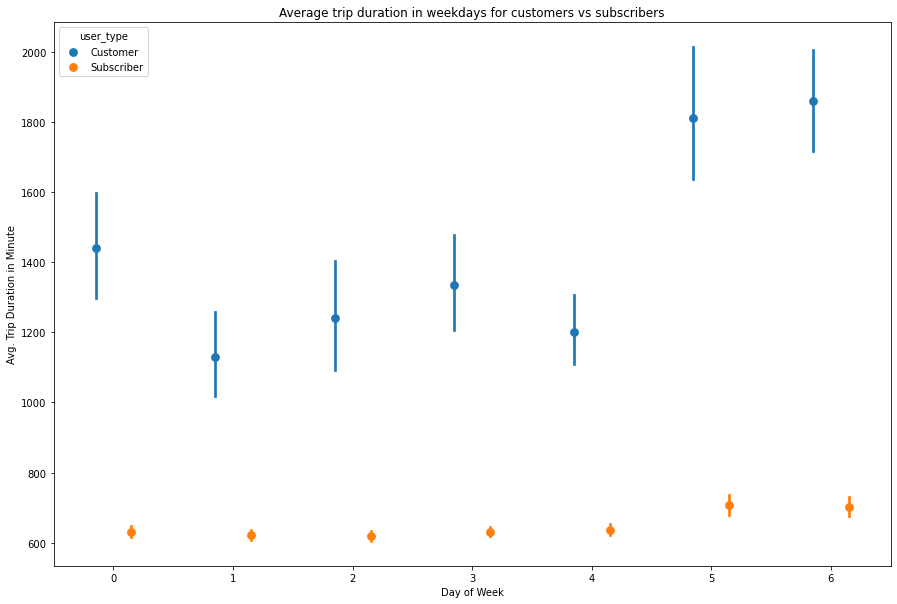

In [38]:
plt.figure(figsize = [15, 10])
sns.pointplot(data=df, x='start_weekday', y='duration_sec', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')
plt.title('Average trip duration in weekdays for customers vs subscribers')

#### Observations :

The above plot shows that :

    - Subscribers take shorter trips compared to customers all week long. 

    - Both user types have increase their trip duration over weekends. 

    - Subscribers seems to have efficient use of bike than customers overall by being near the average especially from Monday to Friday.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Customers have a higher mean trip duration, now we can see this is true across all genders.

> The majority of Old users are Subscribers and they spend little time in their bike 
trips.

> Young Customers trip duration is slightly more than Young Subscribers.

> Subscribers take shorter trips compared to customers all week long. 

> Both user types have increase their trip duration over weekends. 

> Subscribers seems to have efficient use of bike than customers overall by being near the average especially from Monday to Friday.
    
### Were there any interesting or surprising interactions between features?

> I don't believe there was any . When taken together, the various features interactions all complement one another and make perfect sense.

## Conclusions

After the exploration, the main steps I took and the main findings can be summarized below into fours main sections below :

##### Steps taken during the primary wrangling- Cleaning:

1. We converted the below features:
    - start_time, end_time converted into datetime
    - start_station_id, end_station_id converted  to str
    - bike_id converted into str 
    - user_type, bike_share_for_all_trip to  category.
2. We filtered and remove outlier values in the member_birth_year and duration_sec columns
3. We created an age column from member_birth_year
4. We created time columns from start_time & end_time
5. We dropped unecessary/redundant columns

##### Main findings from the univariate  exploration :

- Most of trips took less than 30min a with a peak 10-12 minutes.
- Male users do more trips than female. 
- Most users age is ranging between 29 & 39 .
- Subscribers use bikes more than customers 
- Peak of use of bike is 8am and 17 for. These are rush hours.
- Trips were mostly took during workdays (Monday-Friday) more than week-end.

##### Main findings from the Bivariate  exploration :

- Customers trip durations are longer than the Subscribers to the system.
- Young adults take longer trips.
- Male users take shorters trips than female users.
- The trips are much shorter on Monday-Friday compared to weekends.

##### Main findings from the Multivariate  exploration : 

- Customers have a higher mean trip duration across all genders.
- The majority of Old users are Subscribers and they spend less time in the bike trips.
- Young Customers trip duration is slightly more than Young Subscribers.
- Subscribers take shorter trips compared to customers all week long. 
- Both user types have increase their trip duration over weekends. 
- Subscribers seems to have efficient use of bike than customers overall by being near the average especially from Monday to Friday.
